# Fashion Image Classification with Dimensionality Reduction

In this project, I tackled the challenge of high-dimensional data and implemented binary classification models after applying dimensionality reduction techniques.

## Project Overview

The dataset consists of 28x28 grayscale images derived from the [Fashion MNIST dataset](https://www.kaggle.com/datasets/zalando-research/fashionmnist). These images represent various fashion items, and the goal was to classify them correctly.

I used two datasets:
- `train.csv`: for training and validation, including the target variable `label`.
- `evaluate.csv`: for final evaluation without labels.

## Data Exploration and Preparation

- I loaded the data from `train.csv` and split it into training, validation, and testing subsets.
- I conducted an initial exploratory data analysis, visualized several examples, and discussed the data distribution and characteristics.

## Classification Models

I applied the following classification models:

### 1. **Support Vector Machine (SVM)**
- Explored the model’s appropriateness for image classification.
- Tuned key hyperparameters (e.g., C, gamma).
- Tried at least two different kernel functions (e.g., RBF, linear).
- Evaluated the impact of standardization/normalization on performance.

### 2. **Naive Bayes Classifier**
- Evaluated its assumptions in the context of image data.
- Discussed the effect of normalization.
- Tuned where applicable.

### 3. **Linear Discriminant Analysis (LDA)**
- Investigated its performance on the original high-dimensional feature space.
- Tuned preprocessing steps and evaluated accuracy.

Each model was carefully evaluated and the results were compared and discussed.

## Dimensionality Reduction

I then experimented with reducing the dimensionality of the image data using:

### 1. **Principal Component Analysis (PCA)**
### 2. **Locally Linear Embedding (LLE)**

For both techniques:
- I re-applied the classification models using the transformed data.
- I analyzed how the number of dimensions affected model performance.
- I identified the optimal number of components for the best trade-off between complexity and accuracy.

## Final Model and Evaluation

- Based on all experiments, I selected the best-performing model and reduction technique.
- I estimated its generalization performance on unseen data.

## Results and Submission

I generated predictions on the `evaluate.csv` dataset using the final model. The results were saved in a file named `results.csv`.



### I. Data loading and basic analysis

To complete this task, I will first need the pandas package to work with the data.

In [1]:
import pandas as pd

data = pd.read_csv('train.csv')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 14.4 MB


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,1,0,0,0,0,0,0,0,0,0,...,208,122,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,75,11,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,106,103,76,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The dataset contains a column called "label", which has only two values — 1 and 0 (representing two types of clothing), and 784 columns of pixels representing grayscale color values. I can, for example, look at the images to get a clearer idea of what kinds of clothing we’re dealing with.

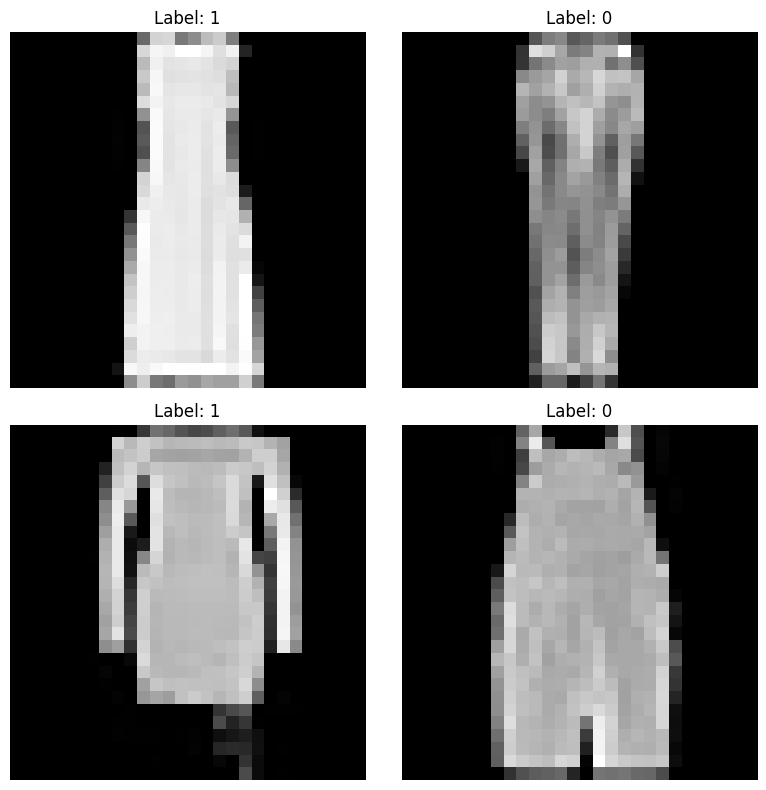

In [2]:
import matplotlib.pyplot as plt

# Define image dimensions
image_height = 28
image_width = 28

num_images_to_show = 4

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for index, ax in zip(range(num_images_to_show), axes.flat):
    # Extract pixel values (excluding the label)
    pixels = data.iloc[index, 1:].values

    # Reshape pixel values into a 28x28 image array
    image = pixels.reshape(image_height, image_width)

    # Display the image in the current subplot
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {data.iloc[index]['label']}")
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

It’s quite clear that the value 1 corresponds to dresses (and, as it turns out, all other garments except pants), and the value 0 corresponds to pants. Now, let’s proceed with further EDA.

In [3]:
data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,2400.000000,2400.0,2400.0,2400.0,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,...,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.00000,2400.000000,2400.000000,2400.0
mean,0.484167,0.0,0.0,0.0,0.002083,0.098333,0.302500,0.846250,2.256250,6.025000,...,65.379583,26.975417,9.651667,3.307500,1.249167,0.460417,0.11250,0.038750,0.010833,0.0
std,0.499853,0.0,0.0,0.0,0.067682,1.895871,5.014792,9.262155,15.491603,25.358871,...,66.874570,49.060424,30.540885,18.067668,11.443957,6.363199,2.82043,1.742655,0.530723,0.0
min,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
25%,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
50%,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
75%,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,114.250000,35.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
max,1.000000,0.0,0.0,0.0,3.000000,69.000000,188.000000,189.000000,219.000000,243.000000,...,248.000000,252.000000,246.000000,212.000000,179.000000,176.000000,88.00000,85.000000,26.000000,0.0


We can notice that the maximum average pixel value ranges from 0 (pixel 1) to, for instance, 178 (pixel 156), and the same applies to the max and median values. It seems appropriate, therefore, to normalize the data. Next, I’ll draw a pie chart showing the percentage share of each label.

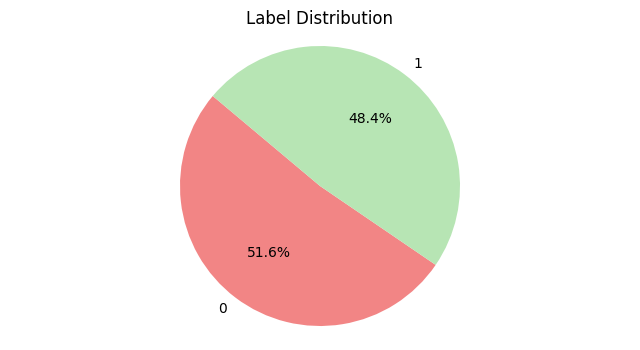

In [4]:
 # Pie plot of label distribution
label_counts = data['label'].value_counts()
labels = label_counts.index
sizes = label_counts.values

plt.figure(figsize=(8, 4))
plt.pie(sizes, labels=labels, colors=['#F28585', '#B7E5B4'], autopct='%1.1f%%', startangle=140)
plt.title('Label Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

This pie chart illustrates the proportion of each clothing item (non-pants vs. pants) — their percentage share is nearly 50/50, which means the dataset is balanced.

I can also plot the distribution of pixel values to see which grayscale shades appear most frequently in the images.

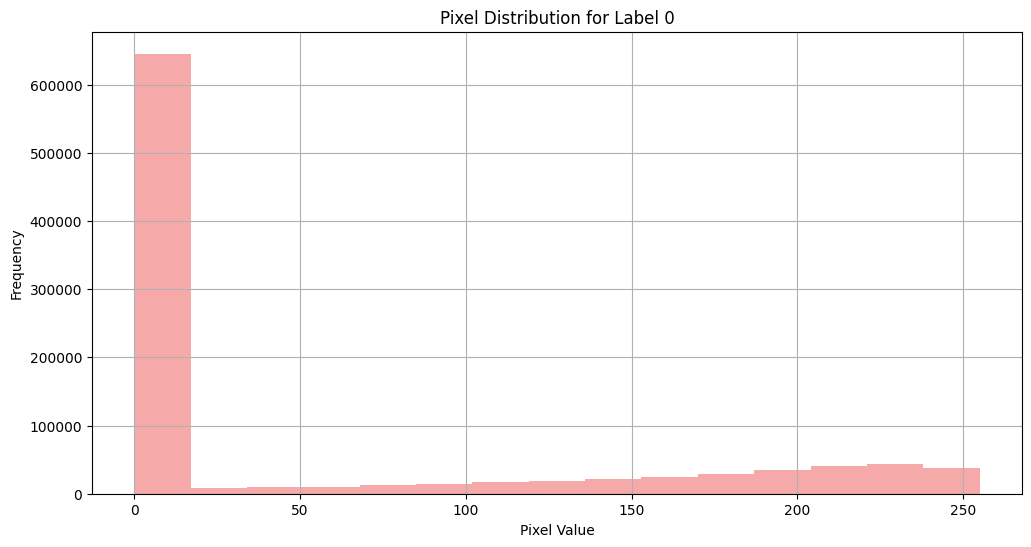

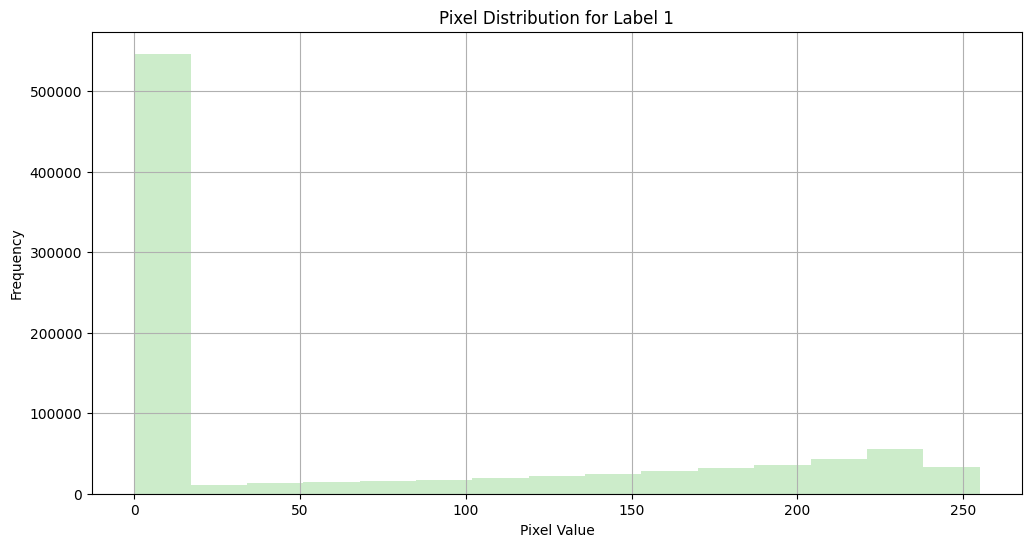

In [5]:
# Histogram of pixel distribution for label 0
label_0_data = data[data['label'] == 0].iloc[:, 1:]
plt.figure(figsize=(12, 6))
plt.hist(label_0_data.values.flatten(), bins=15, color='#F28585', alpha=0.7)
plt.title('Pixel Distribution for Label 0')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Histogram of pixel distribution for label 1
label_1_data = data[data['label'] == 1].iloc[:, 1:]
plt.figure(figsize=(12, 6))
plt.hist(label_1_data.values.flatten(), bins=15, color='#B7E5B4', alpha=0.7)
plt.title('Pixel Distribution for Label 1')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

From the graphs, it’s apparent that the images contain quite a lot of dark shades. After displaying the first four images, this theory was confirmed — there is a lot of black (background) in the images, and the actual clothing items occupy about 50–60% of the image. We can also observe that label 1 (dresses/non-pants) has more white tones, which corresponds to the images since they appear more "solid" (they don’t have black cutouts like the pants do).

### II. Preparing the data for model training

The dataset looks fine, so I’ll now split it in the usual way into X/Y sets, and then further divide them into training, validation, and test sets.

In [6]:
Xdata = data.drop('label', axis=1)
ydata = data.label

In [7]:
from sklearn.model_selection import train_test_split

Xtrain, Xtemp, ytrain, ytemp = train_test_split(Xdata, ydata, test_size=0.4, random_state=42)

display(Xtrain.shape)
display(ytrain.shape)
display(Xtemp.shape)
display(ytemp.shape)

(1440, 784)

(1440,)

(960, 784)

(960,)

In [8]:
Xval, Xtest, yval, ytest = train_test_split(Xtemp, ytemp, test_size=0.5, random_state=42)

display(Xval.shape)
display(yval.shape)
display(Xtest.shape)
display(ytest.shape)

(480, 784)

(480,)

(480, 784)

(480,)

The data are split in a **6/2/2** ratio, with the training set being the largest (60%), and the test and validation sets each holding 20%. This allows me to apply machine learning models and find the best performer.

### III. Support Vector Machines

Support Vector Machines (SVM) is a powerful and widely used machine learning algorithm for classification, regression, and outlier detection. It is known for finding an optimal decision boundary between classes by maximizing the margin between them. However, SVMs do not scale well to very large datasets or datasets with noisy, overlapping classes. Since our data are relatively clean and balanced, I can confidently apply SVM here.


In [9]:
from sklearn import svm

# An initial SVM model with linear kernel   
svm_lin = svm.SVC(kernel='linear')

# Fit the model
svm_lin.fit(Xtrain, ytrain)

SVC(kernel='linear')

In [10]:
from sklearn import metrics

# Make predictions on validation set
pred_val = svm_lin.predict(Xval)

# Calculate confusion matrix on validation data
conf_matrix_val = metrics.confusion_matrix(yval, pred_val)
print('Confusion matrix on validation data:')
print(conf_matrix_val)

# Calculate accuracy on validation data
acc_val = metrics.accuracy_score(yval, pred_val)
print('Accuracy on validation data:', acc_val)

Confusion matrix on validation data:
[[241   9]
 [ 11 219]]
Accuracy on validation data: 0.9583333333333334


The linear model gives me an accuracy of approximately 95.8%. So I'll try a non-linear model with an RBF kernel (for example).

In [11]:
from sklearn import svm

svm_rbf = svm.SVC(kernel='rbf')

svm_rbf.fit(Xtrain, ytrain)

SVC()

In [12]:
# Make predictions on validation set
pred_val = svm_rbf.predict(Xval)

# Calculate confusion matrix on validation data
conf_matrix_val = metrics.confusion_matrix(yval, pred_val)
print('Confusion matrix on validation data:')
print(conf_matrix_val)

# Calculate accuracy on validation data
svm_rbf_acc_val = metrics.accuracy_score(yval, pred_val)
print('Accuracy on validation data:', acc_val)

Confusion matrix on validation data:
[[237  13]
 [  2 228]]
Accuracy on validation data: 0.9583333333333334


The RBF kernel has exactly the same accuracy as the linear kernel. I will now tune the hyperparameters for both kernels using GridSearchCV.

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Initialize SVM classifier
svm = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search cross-validation
grid_search.fit(Xtrain, ytrain)

svm_orig_acc = grid_search.best_score_

# Print best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Print best cross-validation score
print('Best cross-validation score:', grid_search.best_score_)

Best hyperparameters: {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
Best cross-validation score: 0.9659722222222223


Thus, the best SVM model so far provides almost 96.6% accuracy. I will now try normalizing/scaling the data and see what happens.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics

# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit scaler to training data and transform both training and validation data
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xval_scaled = scaler.transform(Xval)

# Initialize SVM classifier with desired kernel
svm_rbf = svm.SVC(kernel='rbf')

# Train SVM classifier on scaled training data
svm_rbf.fit(Xtrain_scaled, ytrain)

# Make predictions on scaled validation set
pred_val = svm_rbf.predict(Xval_scaled)

# Calculate confusion matrix on validation data
conf_matrix_val = metrics.confusion_matrix(yval, pred_val)
print('Confusion matrix on validation data (scaled dataset):')
print(conf_matrix_val)

# Calculate accuracy on validation data
svm_rbf_acc_val = metrics.accuracy_score(yval, pred_val)
print('Accuracy on validation data (scaled dataset):', svm_rbf_acc_val)

Confusion matrix on validation data (scaled dataset):
[[237  13]
 [  1 229]]
Accuracy on validation data (scaled dataset): 0.9708333333333333


In [15]:
# Best params for scaled data
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform, loguniform

# Define parameter distributions
param_dist = {
    'kernel': ['linear', 'rbf'],
    'C': loguniform(1e-3, 1e3),
    'gamma': loguniform(1e-3, 1e3)
}

# Initialize SVM classifier
svm = SVC()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42)

# Perform randomized search cross-validation
random_search.fit(Xtrain_scaled, ytrain)

svm_sc_acc = random_search.best_score_

# Print best hyperparameters
print('Best hyperparameters (scaled dataset):', random_search.best_params_)

# Print best cross-validation score
print('Best cross-validation score (scaled dataset):', random_search.best_score_)

Best hyperparameters (scaled dataset): {'C': np.float64(0.009808478272431488), 'gamma': np.float64(0.0012411333354855072), 'kernel': 'linear'}
Best cross-validation score (scaled dataset): 0.9743055555555558


In [16]:
# Data normalization with MinMax
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn import metrics


# Initialize a MinMaxScaler object
scaler = MinMaxScaler()

# Fit scaler to training data and transform both training and validation data
Xtrain_scaled_mm = scaler.fit_transform(Xtrain)
Xval_scaled_mm = scaler.transform(Xval)

# Initialize SVM classifier with desired kernel
svm_rbf = svm.SVC(kernel='rbf')

# Train SVM classifier on scaled training data
svm_rbf.fit(Xtrain_scaled_mm, ytrain)

# Make predictions on scaled validation set
pred_val_mm = svm_rbf.predict(Xval_scaled_mm)

# Calculate confusion matrix on validation data
conf_matrix_val_mm = metrics.confusion_matrix(yval, pred_val_mm)
print('Confusion Matrix on validation data (normalized dataset):')
print(conf_matrix_val_mm)

# Calculate accuracy on validation data
svm_rbf_acc_val_mm = metrics.accuracy_score(yval, pred_val_mm)
print('Accuracy on validation data (normalized dataset):', svm_rbf_acc_val_mm)

Confusion Matrix on validation data (normalized dataset):
[[238  12]
 [  2 228]]
Accuracy on validation data (normalized dataset): 0.9708333333333333


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Initialize SVM classifier
svm = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search cross-validation
grid_search.fit(Xtrain_scaled_mm, ytrain)

svm_norm_acc = grid_search.best_score_

# Print best hyperparameters
print('Best hyperparameters (normalized dataset):', grid_search.best_params_)

# Print best cross-validation score
print('Best cross-validation score (normalized dataset):', grid_search.best_score_)

Best hyperparameters (normalized dataset): {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score (normalized dataset): 0.9784722222222222


Now I will try to train a naive Bayesian classifier model.

### IV. Naive Bayes

Naive Bayes is the simplest and fastest classification method, and is suitable for dealing with huge amounts of information. In this step, I will use a Gaussian NB classifier. This is used if we assume that all continuous variables associated with each feature are distributed according to a Gaussian distribution (or also a normal distribution). So if we ignore the part of the graphs with large values of black shades (the "Pixel Distribution for Label 0/1" graphs), the distribution of light shades in both labels looks Gaussian.

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(Xtrain, ytrain)

# Predict on the validation set
y_pred = gnb.predict(Xval)

# Calculate accuracy
gnb_orig_acc = accuracy_score(yval, y_pred)

print('Gaussian NB classifier accuracy:', gnb_orig_acc)

Gaussian NB classifier accuracy: 0.95


In [19]:
# Scaled data
gnb_scaled = GaussianNB()

gnb_scaled.fit(Xtrain_scaled, ytrain)

y_pred = gnb_scaled.predict(Xval_scaled)

gnb_sc_acc = accuracy_score(yval, y_pred)

print('Gaussian NB classifier accuracy (scaled dataset):', gnb_sc_acc)

Gaussian NB classifier accuracy (scaled dataset): 0.95


In [20]:
# Normalized data
gnb_norm = GaussianNB()

gnb_norm.fit(Xtrain_scaled_mm, ytrain)

y_pred = gnb_norm.predict(Xval_scaled_mm)

gnb_norm_acc = accuracy_score(yval, y_pred)
print('Gaussian NB classifier accuracy (normalized dataset):', gnb_norm_acc)

Gaussian NB classifier accuracy (normalized dataset): 0.95


It can be seen that the results are exactly the same for the original, scaled, and normalized data, suggesting that the algorithm is robust to changes in the scale and distribution of symptoms. It is possible that the properties of the dataset naturally match the assumptions of the algorithm, leading to the same results for all versions of the data. Essentially, GaussianNB calculates the probability of each class and then selects the one with the highest probability. Therefore, I will not tune the hyperparameters (no parameter tuning is usually required for the GaussianNb classification model).

### V. Linear discriminant analysis

Linear discriminant analysis (LDA) is an approach used in machine learning to solve classification problems of more than 2 classes. LDA separates multiple classes with multiple features by reducing the dimensionality of the data. This technique is important because it helps to optimize machine learning models. LDA is used when the variable being explained is categorical but the other features are continuous. This is our case - we predict a label (0 or 1), but our pixels are continuous values.

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize LDA classifier with store_covariance=True
lda = LinearDiscriminantAnalysis()

# Train the classifier
lda.fit(Xtrain, ytrain)

# Predict on the test set
y_pred = lda.predict(Xval)

# Calculate accuracy
lda_orig_acc = accuracy_score(yval, y_pred)
print('LDA accuracy:', lda_orig_acc)

LDA accuracy: 0.9104166666666667


In [22]:
# Scaled data
lda_scaled = LinearDiscriminantAnalysis()

lda_scaled.fit(Xtrain_scaled, ytrain)

y_pred = lda_scaled.predict(Xval_scaled)

lda_sc_acc = accuracy_score(yval, y_pred)
print('LDA accuracy (scaled dataset):', lda_sc_acc)

LDA accuracy (scaled dataset): 0.9104166666666667


In [23]:
# Normalized data
lda_norm = LinearDiscriminantAnalysis()

lda_norm.fit(Xtrain_scaled, ytrain)

y_pred = lda_norm.predict(Xval_scaled)

lda_norm_acc = accuracy_score(yval, y_pred)
print('LDA accuracy (normalized dataset):', lda_norm_acc)

LDA accuracy (normalized dataset): 0.9104166666666667


As in the case of GaussianNB, the LDA results are the same regardless of the data modification. Thus, the data is already suitable for LDA and normalization/scaling does not make much sense. We can proceed to dimensionality reduction.

### VI. Dimensionality reduction

#### a) PCA

Principal component analysis, or PCA, is a dimensionality reduction method that is often used to reduce the dimensionality of large datasets by transforming a large set of variables into a smaller set that still contains most of the information from the large set. The idea behind PCA is essentially simple: reduce the number of variables in the dataset while preserving as much information as possible.

So now I will try to reduce the dimensionality of our dataset using this method. I will then re-train all the models I created on a new dataset with reduced dimensionality and compare the results.

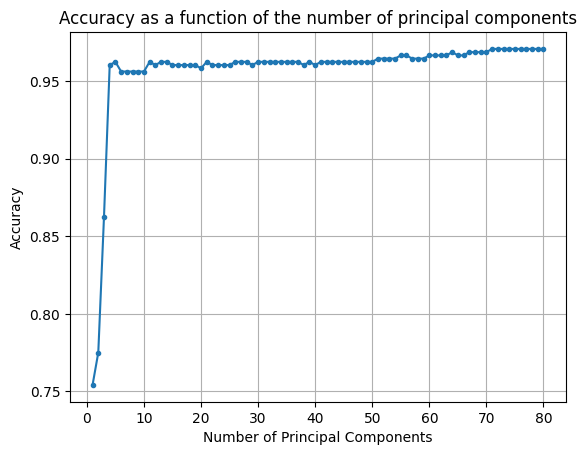

In [24]:
# PCA for SVM model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Initialize lists to store accuracy and number of components
svm_accuracies = []
svm_num_components_list = []

# Max number of components to consider
max_components = 80

for n_components in range(1, min(max_components, Xtrain.shape[1]) + 1):
    # Standardize data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(Xtrain)
    X_val_scaled = scaler.transform(Xval)

    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_val_pca = pca.transform(X_val_scaled)

    # Train SVM classifier
    svm = SVC(kernel='rbf')
    svm.fit(X_train_pca, ytrain)

    # Predict and evaluate accuracy
    y_pred = svm.predict(X_val_pca)
    accuracy = accuracy_score(yval, y_pred)
    svm_accuracies.append(accuracy)
    svm_num_components_list.append(n_components)

# Plot the graph
plt.plot(svm_num_components_list, svm_accuracies, marker='.')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of the number of principal components')
plt.grid(True)
plt.show()

In [25]:
svm_max_accuracy_index = np.argmax(svm_accuracies)
svm_max_accuracy_components = svm_num_components_list[svm_max_accuracy_index]
print(f'Maximum accuracy achieved with {svm_max_accuracy_components} principal components: {svm_accuracies[svm_max_accuracy_index]}')

Maximum accuracy achieved with 71 principal components: 0.9708333333333333


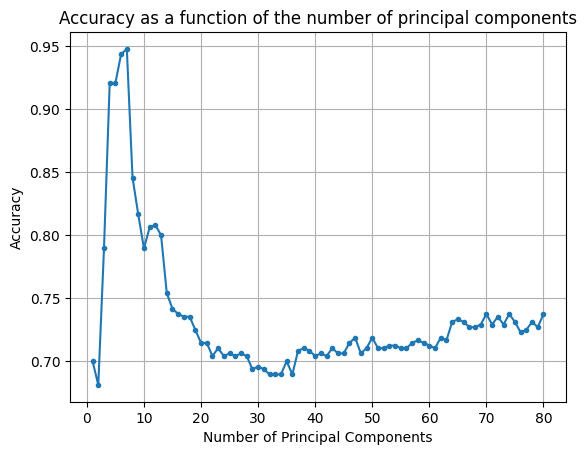

In [26]:
# PCA for GaussianNB model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

gnb_accuracies = []
gnb_num_components_list = []

max_components = 80

for n_components in range(1, min(max_components, Xtrain.shape[1]) + 1):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(Xtrain)
    X_val_scaled = scaler.transform(Xval)

    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_val_pca = pca.transform(X_val_scaled)

    gnb = GaussianNB()
    gnb.fit(X_train_pca, ytrain)

    y_pred = gnb.predict(X_val_pca)
    accuracy = accuracy_score(yval, y_pred)
    gnb_accuracies.append(accuracy)
    gnb_num_components_list.append(n_components)

plt.plot(gnb_num_components_list, gnb_accuracies, marker='.')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of the number of principal components')
plt.grid(True)
plt.show()

In [27]:
gnb_max_accuracy_index = np.argmax(gnb_accuracies)
gnb_max_accuracy_components = gnb_num_components_list[gnb_max_accuracy_index]
print(f'Maximum accuracy achieved with {gnb_max_accuracy_components} principal components: {gnb_accuracies[gnb_max_accuracy_index]}')

Maximum accuracy achieved with 7 principal components: 0.9479166666666666


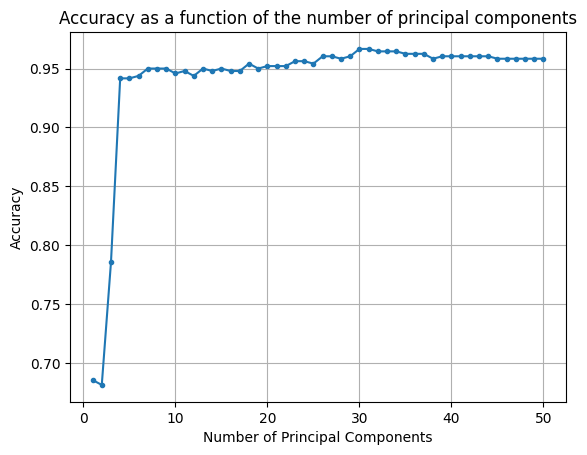

In [28]:
# PCA for LDA model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

lda_accuracies = []
lda_num_components_list = []

max_components = 50

for n_components in range(1, min(max_components, Xtrain.shape[1]) + 1):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(Xtrain)
    X_val_scaled = scaler.transform(Xval)

    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_val_pca = pca.transform(X_val_scaled)

    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train_pca, ytrain)

    y_pred = lda.predict(X_val_pca)
    accuracy = accuracy_score(yval, y_pred)
    lda_accuracies.append(accuracy)
    lda_num_components_list.append(n_components)

plt.plot(lda_num_components_list, lda_accuracies, marker='.')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of the number of principal components')
plt.grid(True)
plt.show()

In [29]:
lda_max_accuracy_index = np.argmax(lda_accuracies)
lda_max_accuracy_components = lda_num_components_list[lda_max_accuracy_index]
print(f'Maximum accuracy achieved with {lda_max_accuracy_components} principal components: {lda_accuracies[lda_max_accuracy_index]}')

Maximum accuracy achieved with 30 principal components: 0.9666666666666667


In PCA I started with a maximum of 10 components for each model and gradually increased the number, then I noticed that after some number of components the accuracy of the model no longer increases, so I limited myself to this number (80, even max_components = 50 for LDA). As can be seen, for a Gaussian classifier, 7 components are enough to achieve almost 95% accuracy. The other models require a bit more, but it is still much better than all 784 dimensions. So let's get down to the LLE.

#### b) LLE

Locally linear embedding (LLE) is an unsupervised approach designed to transform data from the original high-dimensional space into a lower-dimensional representation, while attempting to preserve the basic geometric characteristics of the underlying nonlinear feature structure. It does this by preserving local relationships between data points and seeks to develop the internal multidimensional structure contained in the high-dimensional data. Dimensionality reduction is achieved by constructing a low-dimensional embedding that best reconstructs each data point from its nearest neighbors, thereby revealing the internal geometry of the underlying polygon.

LLE first finds the k-nearest neighbors of the points. It then approximates each data vector as a weighted linear combination of its k-nearest neighbors. Finally, it computes weights that best reconstruct the vectors from their neighbors, and then produces low-dimensional vectors best reconstructed using these weights.

I apply the LLE to each model to determine how many components are sufficient for each model and what accuracy this number of components provides.

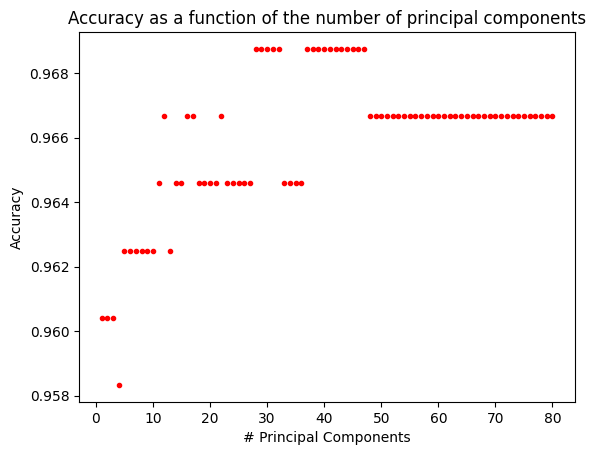

In [30]:
# LLE for SVM model
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.svm import SVC
import matplotlib.pyplot as plt

ACC_LLE_SVM = []

max_components = 80

for n in range(1, min(max_components, Xtrain.shape[1]) + 1):
    # Initialize LLE with parameters
    lle = LocallyLinearEmbedding(n_components=n, n_neighbors=5)
    # Transform data
    Tsub_train = lle.fit_transform(Xtrain)
    Tsub_val = lle.transform(Xval)
    # Train SVM classifier
    clf = SVC(kernel='rbf')
    clf.fit(Tsub_train, ytrain)
    # Save accuracy
    ACC_LLE_SVM.append(clf.score(Tsub_val, yval))

# Plot accuracy as a function of the number of principal components
plt.scatter(range(1, min(max_components, Xtrain.shape[1]) + 1), ACC_LLE_SVM, c='red', marker='.')
plt.title("Accuracy as a function of the number of principal components")
plt.xlabel("# Principal Components")
plt.ylabel("Accuracy")
plt.show()

In [31]:
max_accuracy = max(ACC_LLE_SVM)
max_accuracy_dimension = ACC_LLE_SVM.index(max_accuracy) + 1
print(f"Maximum accuracy = {max_accuracy} for projection dimension {max_accuracy_dimension}.")

Maximum accuracy = 0.96875 for projection dimension 28.


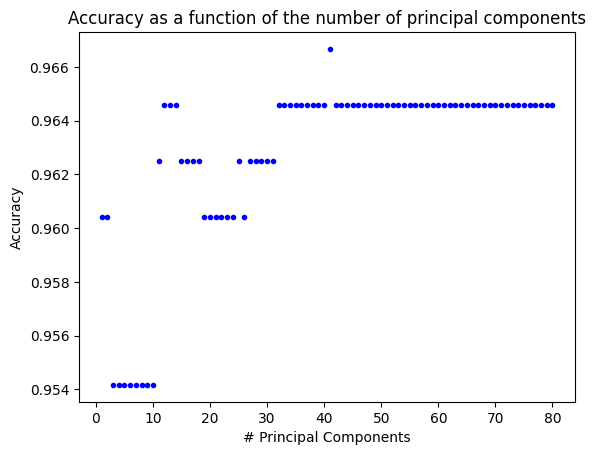

In [32]:
# LLE for GaussianNB model
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

ACC_LLE_GNB = []

max_components = 80

for n in range(1, min(max_components, Xtrain.shape[1]) + 1):
    lle = LocallyLinearEmbedding(n_components=n, n_neighbors=5)
    Tsub_train = lle.fit_transform(Xtrain)
    Tsub_val = lle.transform(Xval)
    clf = GaussianNB()
    clf.fit(Tsub_train, ytrain)
    ACC_LLE_GNB.append(clf.score(Tsub_val, yval))

plt.scatter(range(1, min(max_components, Xtrain.shape[1]) + 1), ACC_LLE_GNB, c='blue', marker='.')
plt.title("Accuracy as a function of the number of principal components")
plt.xlabel("# Principal Components")
plt.ylabel("Accuracy")
plt.show()

In [33]:
max_accuracy = max(ACC_LLE_GNB)
max_accuracy_dimension = ACC_LLE_GNB.index(max_accuracy) + 1
print(f"Maximum accuracy = {max_accuracy} for projection dimension {max_accuracy_dimension}.")

Maximum accuracy = 0.9666666666666667 for projection dimension 41.


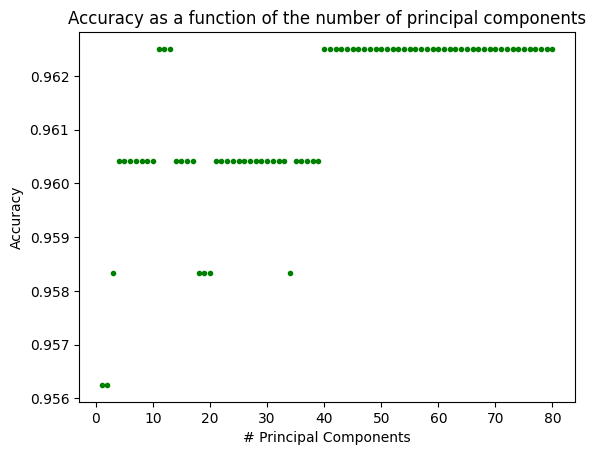

In [34]:
# LLE for LDA model
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

ACC_LLE_LDA = []

max_components = 80

for n in range(1, min(max_components, Xtrain.shape[1]) + 1):
    lle = LocallyLinearEmbedding(n_components=n, n_neighbors=5)
    Tsub_train = lle.fit_transform(Xtrain)
    Tsub_val = lle.transform(Xval)
    clf = LinearDiscriminantAnalysis()
    clf.fit(Tsub_train, ytrain)
    ACC_LLE_LDA.append(clf.score(Tsub_val, yval))

plt.scatter(range(1, min(max_components, Xtrain.shape[1]) + 1), ACC_LLE_LDA, c='green', marker='.')
plt.title("Accuracy as a function of the number of principal components")
plt.xlabel("# Principal Components")
plt.ylabel("Accuracy")
plt.show()

In [35]:
max_accuracy = max(ACC_LLE_LDA)
max_accuracy_dimension = ACC_LLE_LDA.index(max_accuracy) + 1
print(f"Maximum accuracy = {max_accuracy} for projection dimension {max_accuracy_dimension}.")

Maximum accuracy = 0.9625 for projection dimension 11.


LLE performed best in LDA, where it needed only 11 dimensions to achieve 96.25% accuracy. The other models also performed reasonably well.

The reduction is complete, and now we can select the final model and perform the prediction on the evaluation data.

### VII. Selecting the final model

Let us first recall the results obtained for the different models before and after dimensionality reduction.

In [36]:
# Define the accuracy scores
svm_scores = [svm_orig_acc, svm_sc_acc, svm_norm_acc, svm_accuracies[svm_max_accuracy_index], max(ACC_LLE_SVM)]
gnb_scores = [gnb_orig_acc, gnb_sc_acc, gnb_norm_acc, gnb_accuracies[gnb_max_accuracy_index], max(ACC_LLE_GNB)]
lda_scores = [lda_orig_acc, lda_sc_acc, lda_norm_acc, lda_accuracies[lda_max_accuracy_index], max(ACC_LLE_LDA)]

# Create a DataFrame
df = pd.DataFrame({
    'SVM': svm_scores,
    'Gaussian NB': gnb_scores,
    'LDA': lda_scores
}, index=['Original', 'Scaled', 'Normalized', 'PCA', 'LLE'])

print(df)

                 SVM  Gaussian NB       LDA
Original    0.965972     0.950000  0.910417
Scaled      0.974306     0.950000  0.910417
Normalized  0.978472     0.950000  0.910417
PCA         0.970833     0.947917  0.966667
LLE         0.968750     0.966667  0.962500


I will now try to estimate how well my model will perform on the new data, i.e. I will use a test set.

In [37]:
final = SVC(**random_search.best_params_)

final.fit(Xtrain_scaled, ytrain)

SVC(C=np.float64(0.009808478272431488), gamma=np.float64(0.0012411333354855072),
    kernel='linear')

In [38]:
# Make predictions on test set
Xtest_scaled = scaler.transform(Xtest)

pred = final.predict(Xtest_scaled)

# Calculate confusion matrix on test data
conf_matrix_test = metrics.confusion_matrix(ytest, pred)
print('Confusion Matrix on test data:')
print(conf_matrix_test)

# Calculate accuracy on test data
acc_test = metrics.accuracy_score(ytest, pred)
print('Accuracy on test data:', acc_test)

Confusion Matrix on test data:
[[241   7]
 [  4 228]]
Accuracy on test data: 0.9770833333333333


Relatively high accuracy for a test set. I will now make the final prediction and save the result.

In [39]:
evaldata = pd.read_csv('evaluate.csv')

# Extract IDs
IDs = evaldata['ID']

# Drop the 'ID' column from evaluation data
evaldata.drop('ID', axis=1, inplace=True)

evaldata_scaled = scaler.transform(evaldata)

# Make predictions using the final model
predictions = final.predict(evaldata_scaled)

# Create a DataFrame for results
results_df = pd.DataFrame({'ID': IDs, 'label': predictions})

# Save results to a CSV file
results_df.to_csv('results.csv', index=False)

To be sure, I will compare my results with the actual images from the evaluation file. To do this, I will list the first 16 values (labels) from the results and display the first 16 images.

In [40]:
print(results_df.head(16))

    ID  label
0    0      1
1    1      0
2    2      1
3    3      0
4    4      1
5    5      0
6    6      1
7    7      1
8    8      0
9    9      1
10  10      0
11  11      1
12  12      1
13  13      1
14  14      0
15  15      0


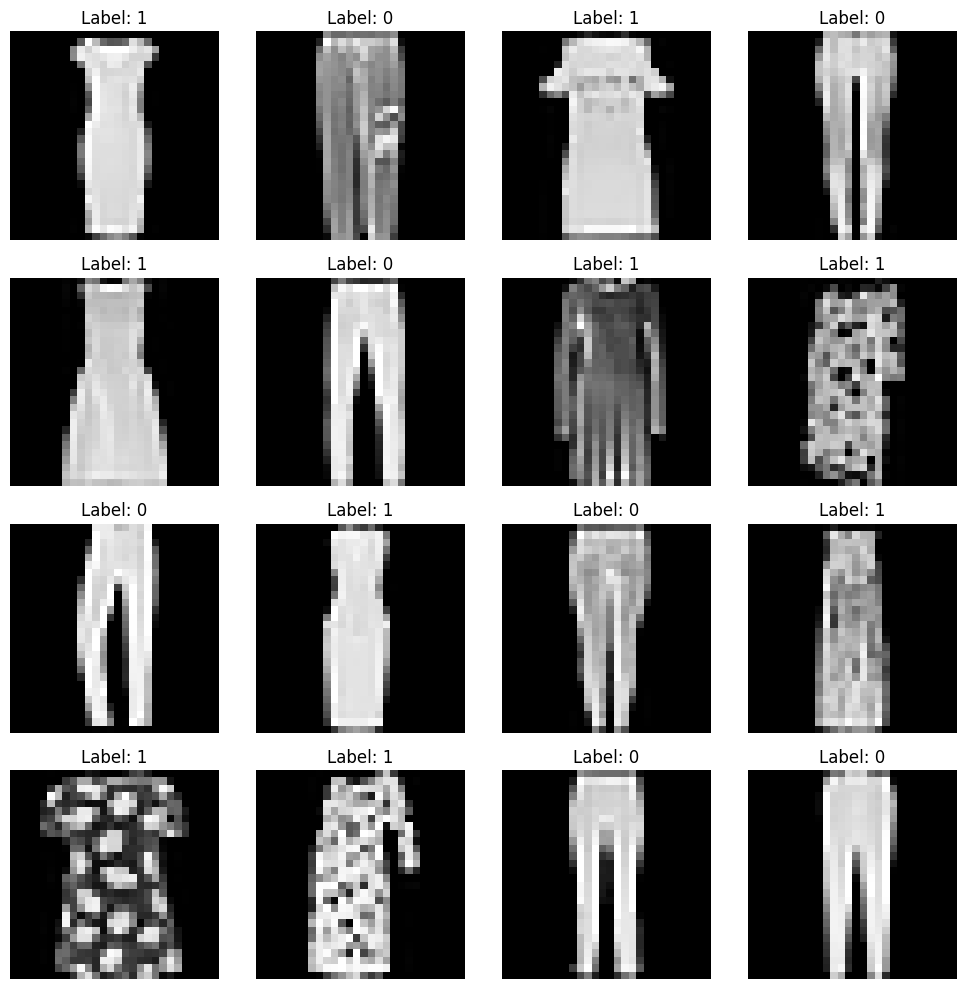

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
evaldata = pd.read_csv('evaluate.csv')
results_df = pd.read_csv('results.csv')

# Extract pixel values of the first 16 images
images = evaldata.iloc[:16, 1:].values

# Extract labels of the first 16 images from results_df
labels = results_df.iloc[:16, 1].values

# Reshape each image into a 28x28 matrix
images = images.reshape(-1, 28, 28)

# Plot the images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Label: {labels[i]}')  # Add label to title

plt.tight_layout()
plt.show()

In general, at least for the first 16 images, the model gives 100% accuracy: pants are marked 0, non-pants are marked 1, which makes me very happy. :)